# Linear Regression

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression
- A. Geron: Hands-on Machine Learning
- S. Raschka: Python Machine Learning



### Linear regression - a short reminder

Linear regression computes a weighted sum of the input features and adds a bias term, with $\hat y = \theta_0 + \theta_1 x_1 + \dots + \theta_n x_n$, where

- $\hat y$ is the predicted value
- $n$ is the number of features  
- $x_i$ is the $i^th$ feature value
- $\theta_j$ is the $j^th$ model parameter, where $\theta_0$ is the bias term and $\theta_1, \theta_2, \dots, \theta_n$ are the weights

### We can also express linear regression in a vectorised form

$\hat y = \mathbf{\theta}^\top \mathbf{x}$, where

- $\mathbf{\theta}^\top$ is the model's parameter vector (a row vector)
- $\mathbf{x}$ is the feature vector (a column vector)

Note that to incorporate the bias term $ \theta_0$, we add $x_0 = 1$ and get $\theta_0 x_0 + \theta_1 x_1 + \dots$

### Mean Squared Error MSE

To measure the performance we compute the difference between predicted value $\hat y$ and true value $y$ using mean squared error:

$ \text{MSE}(\mathbf{\theta}) = \frac{1}{m} \sum_{i=1}^m \left( \mathbf{\theta}^\top \mathbf{x}^{(i)} - y^{(i)}\right)^2 = \frac{1}{m} \sum_{i=1}^m \left( \hat y^{(i)} - y^{(i)}\right)^2 $, 

where $m$ is the number of examples in the dataset


### Normal Equation

Because the MSE loss is quadratic, we can use the normal equation to compute $\mathbf{\hat \theta}$ (bias $\hat \theta_0$ and weight $\hat \theta_1$), that is the parameter values that minimise the MSE:

$ \hat \theta = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}  $, where

- $\hat \theta$ is the value of $\theta$ that minimises the cost function
- $ \mathbf{y} $ is the vector of true values containing $\mathbf{y}^{(1)}, \dots, \mathbf{y}^{(m)}$  

### Recap

To get the best linear regression fit for a dataset we compute $\mathbf{\hat \theta}$ using the normal equation. Then, we insert $\mathbf{\hat \theta}$ into the linear regression equation and use it to predict new examples. 

- Normal equation: $ \hat \theta = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}  $
- Linear regression: $\hat y = \mathbf{\hat \theta}^\top \mathbf{x}$


### How to set up the algorithm?

1. Import the necessary packages
2. Create a dataset (or import one)
3. Compute the normal equation
4. Analyse the result
5. Use the fitted algorithm to predict new examples
6. Visualise the result

In [1]:
# 1. Imports
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl

# set plot parameters
mpl.rc('axes', labelsize=14)  # axis labels
mpl.rc('xtick', labelsize=12)  # axis ticks
mpl.rc('ytick', labelsize=12)
mpl.rc('legend', fontsize=16) 
mpl.rc('legend', title_fontsize=16)
mpl.rc('figure', figsize=(12, 6))
# mpl.rc('figure', titlesize=20)
seed = 1337  # used to get the same result each run 

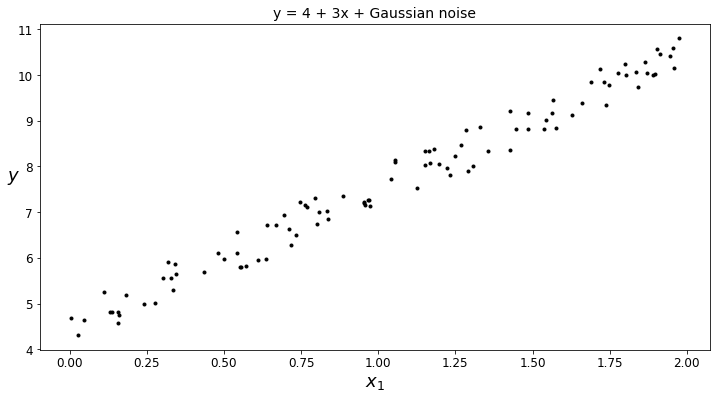

In [2]:
# 2. Create some data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100,1)
plt.plot(X, y, 'k.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title('y = 4 + 3x + Gaussian noise', fontsize=14);

### 3. Compute the normal equation

Now, to find the parameters $\hat \theta$ (bias $\hat \theta_0$ and weight $\hat \theta_1$) that minimise the MSE among all the possible parameter values $\mathbf{\theta}$, we compute $\hat \theta$ using the Normal Equation $ \hat \theta = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}  $

In [3]:
# First, we need to add x_0=1 to each example, which we need to treat the bias like the weights
print(X[:2], '\n')
X_b = np.c_[np.ones((100,1)), X]  
print(X_b[:2,:])

[[0.6383647 ]
 [0.69409289]] 

[[1.         0.6383647 ]
 [1.         0.69409289]]


In [4]:
# Second, we compute the minimising paramesters using the normal equation 
theta_hat = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_hat

array([[4.47267795],
       [3.03847345]])

### 4. Analyse the result

- Data-generating function: $ y = 4 + 3x + \text{Gaussian noise}$
- Fitted function: $ y = 4.46 + 2.99x $

Due to the Gaussian noise, the bias term (intercept) is somewhat off while the weight (slope) is very close to the true value.

In [5]:
# 5. Use the fitted function to predict new examples
# Create new examples
X_new = np.arange(3)
X_new_b = np.c_[np.ones_like(X_new), X_new]
print(f'X_new:\n {X_new_b}, \ntheta_hat:\n {theta_hat}')
y_predict = X_new_b.dot(theta_hat)  # 1*4.46 + 0*2.99, 1*4.46 + 1*2.99, 1*4.46 + 2*2.99
y_predict

X_new:
 [[1 0]
 [1 1]
 [1 2]], 
theta_hat:
 [[4.47267795]
 [3.03847345]]


array([[ 4.47267795],
       [ 7.5111514 ],
       [10.54962485]])

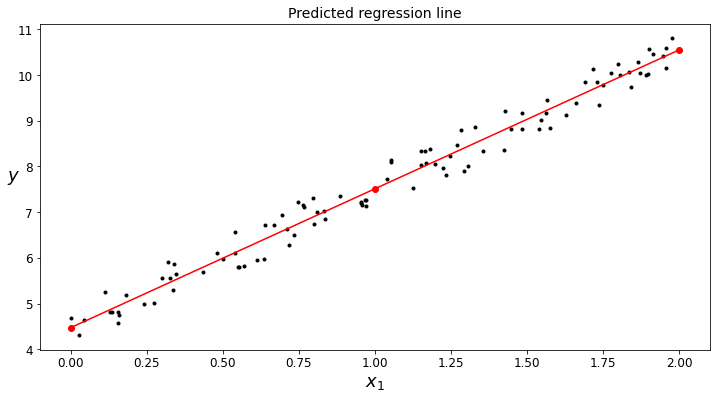

In [6]:
# 6. Visualisation
plt.plot(X, y, 'k.')
plt.plot(X_new, y_predict, 'r-')
plt.plot(X_new, y_predict, 'ro')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title('Predicted regression line', fontsize=14);

## Let's do the same using Scikit learn

Let's look for the method: https://scikit-learn.org/stable/

1. Import the necessary packages
2. Create a dataset (or import one)
3. Set up and fit the Scikit-Learn method
4. Analyse the result
5. Use the fitted algorithm to predict new examples
6. Visualise the result

In [7]:
# 1. Imports
from sklearn.linear_model import LinearRegression

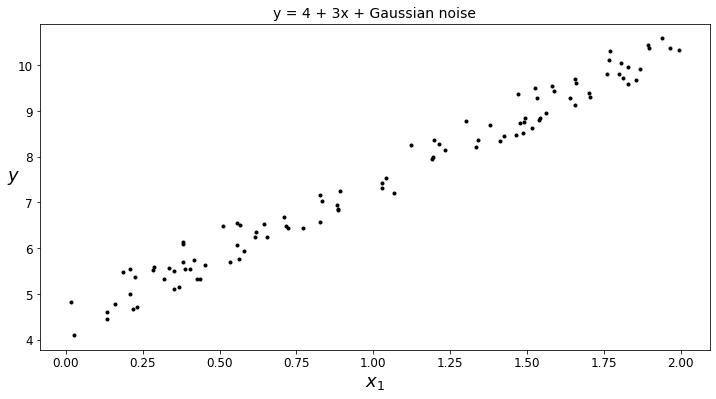

In [8]:
# 2. Create some data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100,1)
plt.plot(X, y, 'k.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title('y = 4 + 3x + Gaussian noise', fontsize=14);

In [9]:
# 3. Set up and fit the linear regressor 
X_b = np.c_[np.ones((100,1)), X]  # add x_0 = 1

reg = LinearRegression()  # normalize=True
reg = reg.fit(X_b, y)

In [10]:
# 4. Analyse the results

reg.get_params(), reg.coef_, reg.intercept_  # Note that scikit-learn treats the intercept independent

({'copy_X': True,
  'fit_intercept': True,
  'n_jobs': None,
  'normalize': False,
  'positive': False},
 array([[0.       , 3.0287671]]),
 array([4.40307963]))

In [11]:
# 5. Predict new examples 
X_new = np.arange(3)  # create new data for prediction
X_new_b = np.c_[np.ones_like(X_new), X_new]  # add x_0 = 1

y_predict = reg.predict(X_new_b)  
y_predict

array([[ 4.40307963],
       [ 7.43184673],
       [10.46061383]])

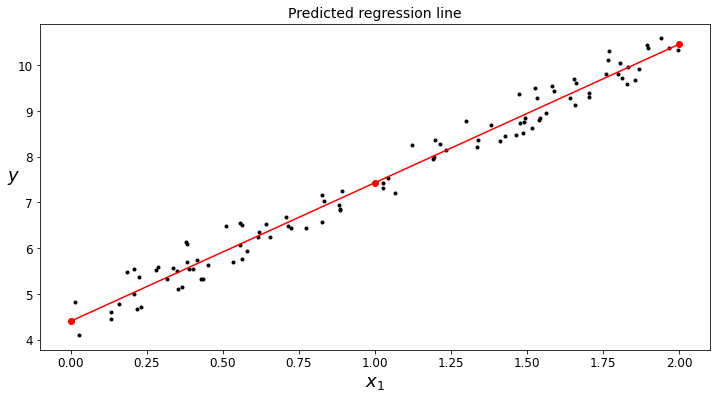

In [12]:
# 6. Visualise
plt.plot(X, y, 'k.')
plt.plot(X_new, y_predict, 'r-')
plt.plot(X_new, y_predict, 'ro')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title('Predicted regression line', fontsize=14);

### Regression with a real dataset 

https://scikit-learn.org/stable/modules/classes.html?highlight=datasets#module-sklearn.datasets

In [13]:
# Imports
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
import pandas as pd
import seaborn as sns
# https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

X, y = load_boston(return_X_y=True)
boston_data = load_boston()
print(X.shape, y.shape, X[0, :], y[0])  

(506, 13) (506,) [6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00] 24.0


In [14]:
# Visualise the data

df = pd.DataFrame(data=boston_data['data'], columns=boston_data['feature_names'])

# add the target variable y to the dataframe
df.insert(0, 'MEDV', boston_data['target'])

for col in ['ZN', 'CRIM', 'INDUS', 'CHAS', 'DIS', 'NOX', 'RAD', 'PTRATIO', 'B']:
    del df[col]

print(df.head())

   MEDV     RM   AGE    TAX  LSTAT
0  24.0  6.575  65.2  296.0   4.98
1  21.6  6.421  78.9  242.0   9.14
2  34.7  7.185  61.1  242.0   4.03
3  33.4  6.998  45.8  222.0   2.94
4  36.2  7.147  54.2  222.0   5.33


### Target and features

- MEDV     Median value of owner-occupied homes in 1000's 
- RM       Average number of rooms per dwelling
- AGE      Proportion of owner-occupied units built prior to 1940
- TAX      Full-value property-tax rate per 10,000 dollar
- LSTAT    Percentage lower status of the population


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MEDV,506.0,22.532806,9.197104,5.000,17.0250,21.2000,25.0000,50.00
RM,506.0,6.284634,0.702617,3.561,5.8855,6.2085,6.6235,8.78
AGE,506.0,68.574901,28.148861,2.900,45.0250,77.5000,94.0750,100.00
TAX,506.0,408.237154,168.537116,187.000,279.0000,330.0000,666.0000,711.00
LSTAT,506.0,12.653063,7.141062,1.730,6.9500,11.3600,16.9550,37.97


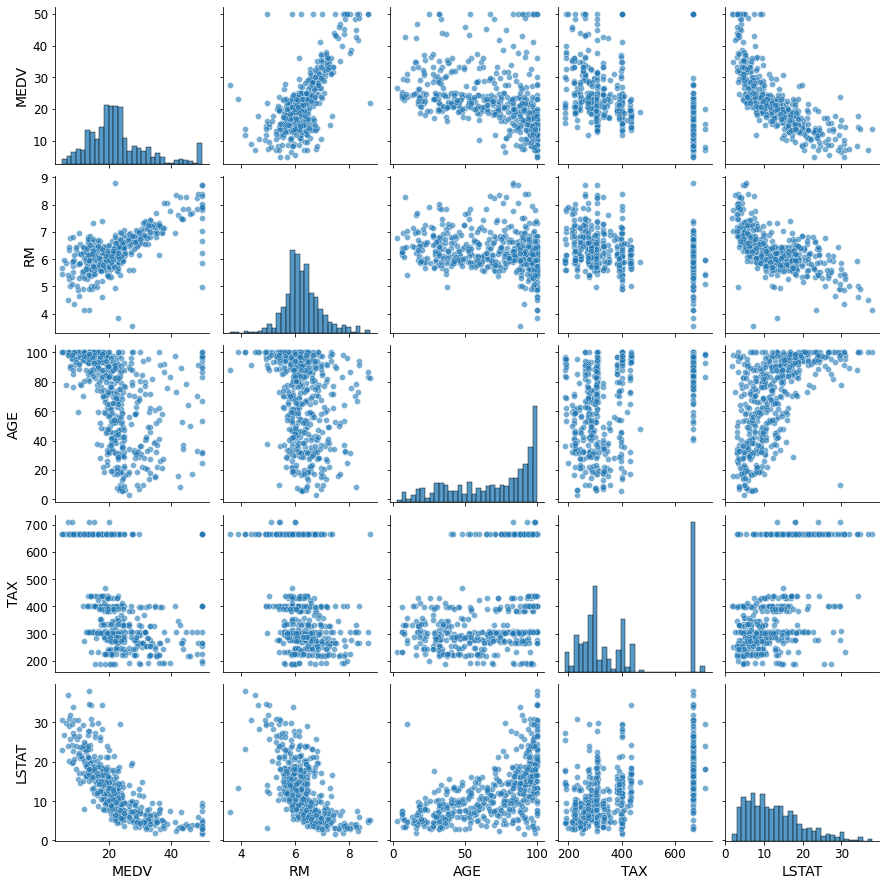

In [16]:
sns.pairplot(df, plot_kws={'alpha': 0.6}, diag_kws={'bins': 30})

### Let's first try to predict the median home values using only one feature "number of rooms"

In [17]:
# Set up the method
reg = LinearRegression()  

X_RM, y_RM = X[:,[5]], y  # use only the fifth feature, which is the number of rooms

X_train_RM, X_test_RM, y_train_RM, y_test_RM = train_test_split(X_RM, y_RM, random_state=42)  
X_train_RM.shape, X_test_RM.shape, y_train_RM.shape, y_test_RM.shape

((379, 1), (127, 1), (379,), (127,))

In [18]:
# Fit and predict 
reg.fit(X_train_RM, y_train_RM)  # fit the linear regression to our training data
y_predict_RM = reg.predict(X_test_RM)  # use the test data for prediction

mse = mean_squared_error(y_predict_RM, y_test_RM)  # calculate the performance measure
mse, np.sqrt(mse), reg.coef_, reg.intercept_

(42.74963952740483, 6.53832084922458, array([9.30417153]), -35.92697627454079)

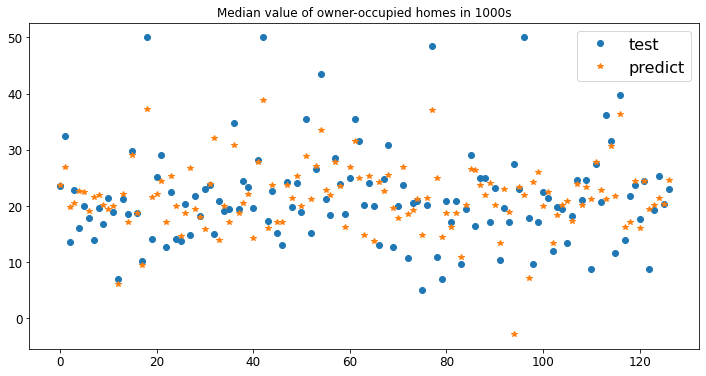

In [19]:
# Visualise
plt.plot(y_test_RM, 'o', label='test')
plt.plot(y_predict_RM, '*', label='predict')
plt.legend()
plt.title('Median value of owner-occupied homes in 1000s');

### Now, let's try to use all features

Since the features of the Boston dataset have different units, we should standardise the data so that all features have the properties of a normal distribution with mean 0 and standard deviation 1. 

For more information about standardisation: https://sebastianraschka.com/Articles/2014_about_feature_scaling.html

In [20]:
# combine feature scaling (standardisation) and the prediction method into a pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reg', LinearRegression())])

In [21]:
# Split the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

In [22]:
# Fit and predict
pipe.fit(X_train, y_train)
y_predict = pipe.predict(X_test)
mse = mean_squared_error(y_predict, y_test)
mse, np.sqrt(mse), pipe.named_steps['reg'].coef_, pipe.named_steps['reg'].intercept_

(22.098694827097987,
 4.700924890603761,
 array([-1.06546379,  0.68154987,  0.33928836,  0.73726309, -1.93178062,
         3.14172655, -0.25586276, -2.95561026,  2.21416067, -1.65127265,
        -2.08714915,  1.15235744, -3.69504236]),
 22.90791556728235)

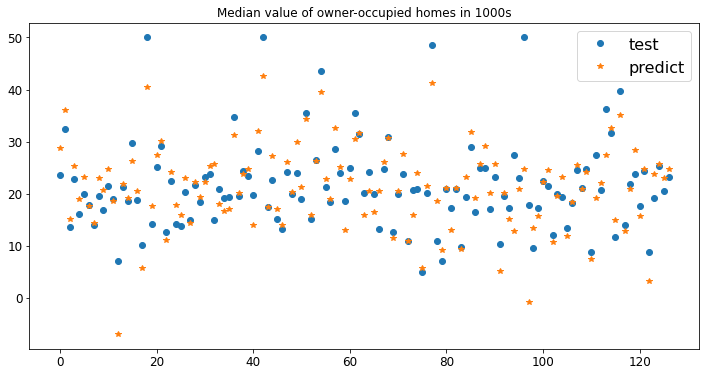

In [23]:
# Visualise
plt.plot(y_test, 'o', label='test')
plt.plot(y_predict, '*', label='predict')
plt.legend()
plt.title('Median value of owner-occupied homes in 1000s');

### Training, validation and test sets

Generally, we want to use three separate datasets, one for training, one for validation and one for testing. The test dataset is used only at the very end to determine the model's final performance. Because splitting a small dataset into three distinctively reduces the number of examples we can use for training, we split the dataset in two, just like before, but use cross-validation on the training dataset.

See also: https://scikit-learn.org/stable/modules/cross_validation.html

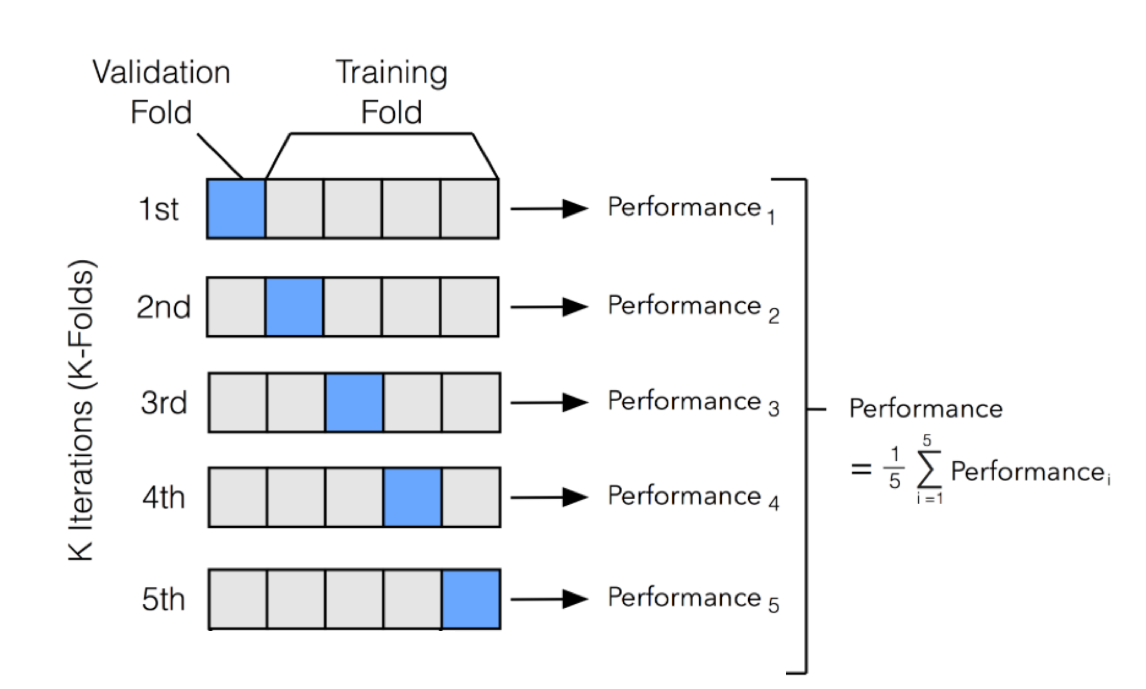

Image source: https://ethen8181.github.io/machine-learning/model_selection/model_selection.html

In [24]:
# use cross validation
result = cross_validate(pipe, X_train, y_train, scoring='neg_mean_squared_error')  # defaults to 5-fold CV
np.sqrt(-result['test_score']), np.sqrt(-np.mean(result['test_score']))


(array([4.76034358, 5.65947636, 4.96607592, 4.50715356, 4.88594928]),
 4.970701910437048)

### Conclusion

- Linear regression
- Use pipelines to combine data preprocessing and prediction
- Use train_test_split to randomly split your data into training and test sets
- Use cross-validation  

# Logistic Regression

### Set up a logistic regression algorithm
- Use the digits dataset for classification, which you can find here: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets
- Data understanding: 
    - Load the dataset. How many elements are in every class category, that is how many *zeros*, *ones*, ... Hint: With 
```X_ones = X[y==1]``` 
you get all the elements of an array with the label = 1. 
    - Visualise the digit images. The images are saved as a vector, hence you have to reshape them from (64) to (8,8) to visualise them. What Matplotlib function can you find to do so?
- Data manipulation
    - Use the multi-label digits dataset and create a binary dataset, with all digits = 1 as one class category and all other digits as the second class category (that is we will train a classifier that detects 1s). Hint: With 
    ```y_ones = (y==1)``` 
    you get a binary vector, where all elements are True that equal 1 and all others are False.
    - Visualise examples of your binary dataset to validate your data manipulation
- Train the algorithm
    - Split your data into a training and test set 
    - Set up the logistic regression, including standardisation (what happens if you don't standardise the data?)
    - Analyse the result using an appropriate metric, e.g. accuracy. Hint: Also take into account the actual percentage of *ones* in the dataset. How useful is the accuracy metric? What other metrics are there?
    - How does the result change if you change the algorithm's hyperparameters? 
    - Optional: Use a different classifier / use the original dataset for multi-class classification
    

In [124]:
#import data
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_validate, cross_val_predict
data, target = load_digits(return_X_y=True)


(1797, 64)
(1797,)
Num of 0s:178
Num of 1s:182
Num of 2s:177
Num of 3s:183
Num of 4s:181
Num of 5s:182
Num of 6s:181
Num of 7s:179
Num of 8s:174
Num of 9s:180
(1797, 8, 8)


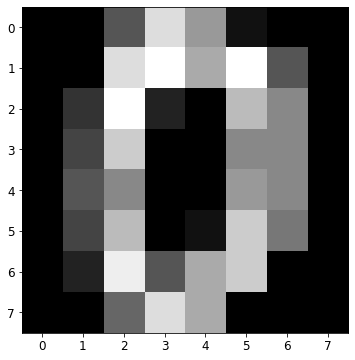

In [112]:
#Data understanding
print(data.shape)
print(target.shape)
for i in range(0,10):
    print("Num of " + str(i)+ "s:"+str(len(target[target==i])))
       
data_plot=np.zeros((len(data),8,8))
for i in range (0,len(data)):
    data_plot[i]=data[i].reshape(8,8)  
    
print(data_plot.shape)

plt.imshow(data_plot[0], cmap='gray')

In [152]:
#Data manipulation
#Use 6 as 1 and 0,1,2,3,4,5,7,8,9 as 0
y_ones_6=(target==6).astype(int)
print("Num of all labels: " +str(len(y_ones_6)))
print("Num of '1' labels (6):"+str(len(y_ones_6[y_ones_6==1])))
print("Num of '0' labels (not 6):"+str(len(y_ones_6[y_ones_6!=1])))

Num of all labels: 1797
Num of '1' labels (6):181
Num of '0' labels (not 6):1616


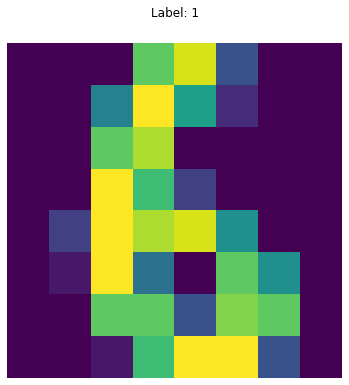

In [153]:
#Train Algorithm
X_train, X_test, y_train, y_test = train_test_split(data, y_ones_6, random_state=42)
ex = 15
plt.matshow(X_train[ex].reshape(8,8))
plt.axis('off')
plt.title(f'Label: {y_train[ex]}');  # labels: 0: not 1, 1: 1

In [164]:
#set up Logistic Regression
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reg', LogisticRegression(solver='liblinear'))])

In [165]:
#train algorithm
pipe.fit(X_train, y_train)
y_predict = pipe.predict(X_test)
acc = accuracy_score(y_predict, y_test)
acc

0.9977777777777778

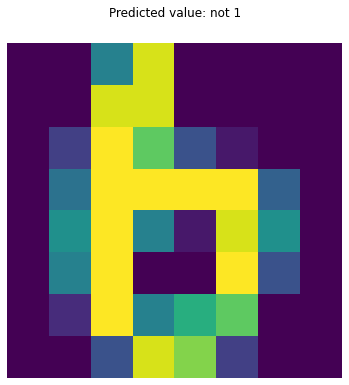

In [166]:
#show wrong predictions
pred_dif = (y_predict==y_test)
pred_dif_args = np.argwhere(pred_dif==False)
for i in pred_dif_args: 
    plt.matshow(X_test[i].reshape(8,8))
    plt.axis('off')
    ttl = '1' if y_predict[i] > 0 else 'not 1'
    plt.title(f'Predicted value: {ttl}'); 